<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metoda Monte Carlo

Metoda Mote Carlo je metodou statistických pokusů. Je potřeba provést velké množství pokusů a tyto následně vyhodnotit. Pro přesnější výsledky je třeba větší množství pokusů. Přesnost výsledků je také závislá na přesnosti generování pokusů, neboli na náhodě. Toto platí speciálně v případě počítačů, kdy používáme tzv. pseudonáhodné generátory náhodných čísel. 

Tyto generátory náhodných čísel jsou ve skutečnosti algoritmy, které generují poslouponosti na základě matematických vztahů. Máme k dispozici generátory, jejichž vlastnosti odpovídají teoretickým předpokladům o generátorech náhodných čísel.

Generátory náhodných čísel v počítači jsou typicky generátory s rovnoměrným rozdělením na intervalu $<0;1>$. Generátory s odlišným rozdělením jsou realizovány s pomocí matematických transformací.

## Buffonova jehla

Převzato z https://github.com/SamuelHunter/Buffon/blob/master/buffon.py

http://pythonfiddle.com/buffons-needle-experiment/

Na podlaze jsou čáry ve vzálenosti $b$. Házíme na zem jehlu o délce $a$. Počítáme pokusy, kdy jehla padla na čáru.

$$\pi \approx \frac{2an}{bc}$$

kde $n$ je počet pokusů (hozených jehel) a $c$ je počet úspešných pokusů.


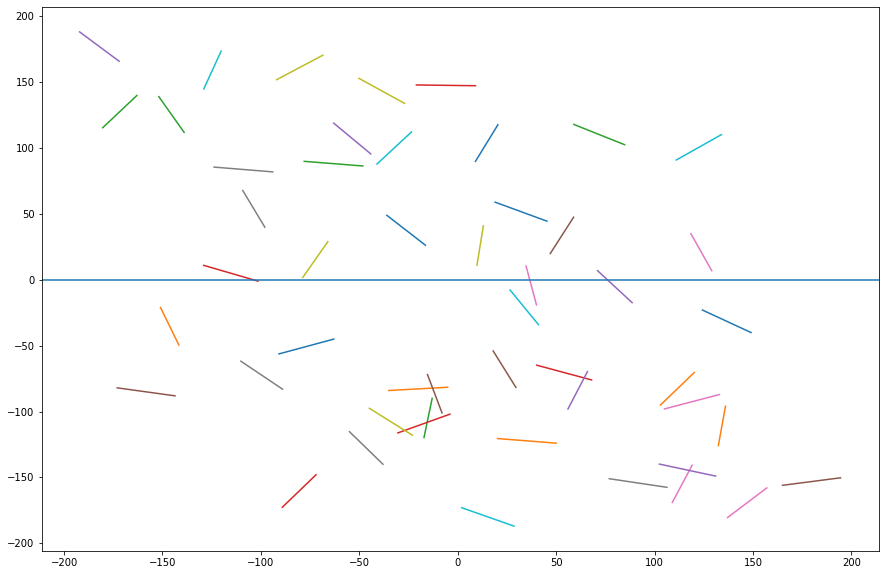

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
import random
from math import cos, sin, pi

def plotLine(sx, sy, ex, ey):
  plt.plot([sx, ex], [sy, ey])

#Estimating Pi using Buffon's Needle # www.101compiting.net/estimating-pi-using-buffons-needle

boardWidth = 40
needleLength = 30
numberOfNeedles = 50
    
y = 180
count = 0
for needle in range(0, numberOfNeedles):
  xs = random.randint(-180, 180)
  ys = random.randint(-180, 180)
  angle = random.random() * 2 * pi
  xe = xs + needleLength * cos(angle)
  ye = ys + needleLength * sin(angle)

  if (ys <= 0) and (ye >= 0):
    count = count + 1
  plotLine(xs, ys, xe, ye)
  
plt.axhline()


In [ ]:
'''
From Statistical Mechanics by Werner Krauth

Buffon's Needle Experiment
n = number of throws
r = number of runs
a = length of needle
b = distance between cracks
theta = angle needle makes to crack
rcenter = center of needles on floor
0  < theta < pi/2
0 < xcenter < b/2

nhits <===  number of hits of needle centered at x, with orientation theta
nhits = 1 if x < a/2 and abs(theta) < arcos(x/(a/2))
      = 0 otherwise
'''

import random
import math

def buffon(n, r, a, b):
    data=[]
    print('Buffon Needle Experiment (Google it) ')
    print('Runs\tNumber Hits\testimate of pi')
    for jj in range(r):
        nhits = 0
        for ii in range(n):
            xcent = random.uniform(0, b / 2.0)
            theta = random.uniform(0, math.pi/2)
            xtip  = xcent - (a / 2.0) * math.cos(theta)  #use of cosine not historically accurate
            if xtip < 0 :
                nhits += 1

        c = 2.0 * a * n
        d = b * nhits
        print(str(jj), '\t', str(nhits), '\t', str(c / d))
        data.append([jj,nhits])
    return data
        

r = 5
n = 1000000
a = 2  #needle 2 inches
b = 2  #cracks 2 inch spacing

hits= buffon(n, r, a, b)
print(math.pi)

Buffon Needle Experiment (Google it) 
Runs	Number Hits	estimate of pi
0 	 636604 	 3.1416704890324283
1 	 636833 	 3.140540769715137
2 	 636413 	 3.142613365848906
3 	 636769 	 3.1408564173193105
4 	 636420 	 3.142578800163414
3.141592653589793


## Výpočet integrálu pod křivkou

Mějme útvar, jehož plochu známe (obdélník či čtverec například) a funkci $f$, jejíž integrál na intervalu $<x_s,x_e>$ hledáme a jejíž body na stejném intervalu patří do útvaru.

Generujeme náhodné body, které padří do útvaru v celkovém počtu $n$ a počítáme, kolik z těchto bodů ($c$) je pod křivkou, tedy

$$y \lt f(x)$$

Potom platí, že

$$\int_{x_s}^{x_e}f(x)dx \approx S \frac{c}{n}$$

In [7]:
def plocha(f, xs, xe, ys, ye, c = 10000):
  xdelta = xe - xs
  ydelta = ye - ys

  count = 0
  for i in range(c):
    x = random.random() * xdelta + xs
    y = random.random() * ydelta + ys

    fv = f(x)
    if y < fv:
      count = count + 1
  return count / c * xdelta * ydelta


0.4514
0.4953


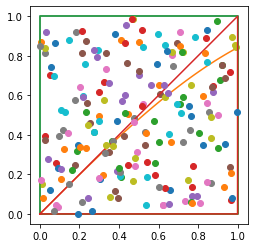

In [9]:
import math

def plotIt(f, xs, xe, ys, ye, c = 100):
  xdelta = xe - xs
  ydelta = ye - ys

  plt.plot([xs, xe, xe, xs, xs], [ys, ys, ye, ye, ys])
  count = 0
  xx = []
  yy = []
  for i in range(101):
    x = i * xdelta / c + xs
    y = f(x)
    xx.append(x)
    yy.append(y)
  xx.append(x)
  yy.append(0)
  xx.append(0)
  yy.append(0)

  plt.plot(xx,yy)

  for i in range(c):
    x = random.random() * xdelta + xs
    y = random.random() * ydelta + ys
    plt.plot([x], [y], 'o')

  plt.grid(which = 'both')  
  plt.gca().set_aspect('equal')


def trojuhelnik(x):
  return x

plotIt(math.sin, 0, 1, 0, 1)
print(plocha(math.sin, 0, 1, 0, 1))

plotIt(trojuhelnik, 0, 1, 0, 1)
print(plocha(trojuhelnik, 0, 1, 0, 1))

In [10]:
print(0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1)

0.7999999999999999


## Generování náhodných čísel

### Rovnoměrné rozdělení

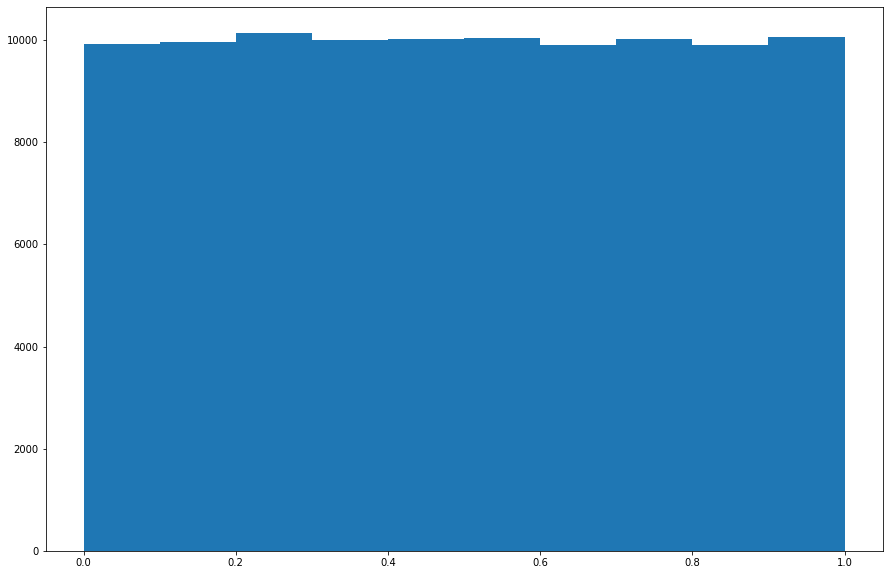

In [ ]:
def randomNumbers(count=10000):
  result = []
  for i in range(count):
    result.append(random.random())
  return result

plt.hist(randomNumbers(100000));

### Normální rozdělení

Text(0.5, 1.0, 'Gaussovo rozdělení')

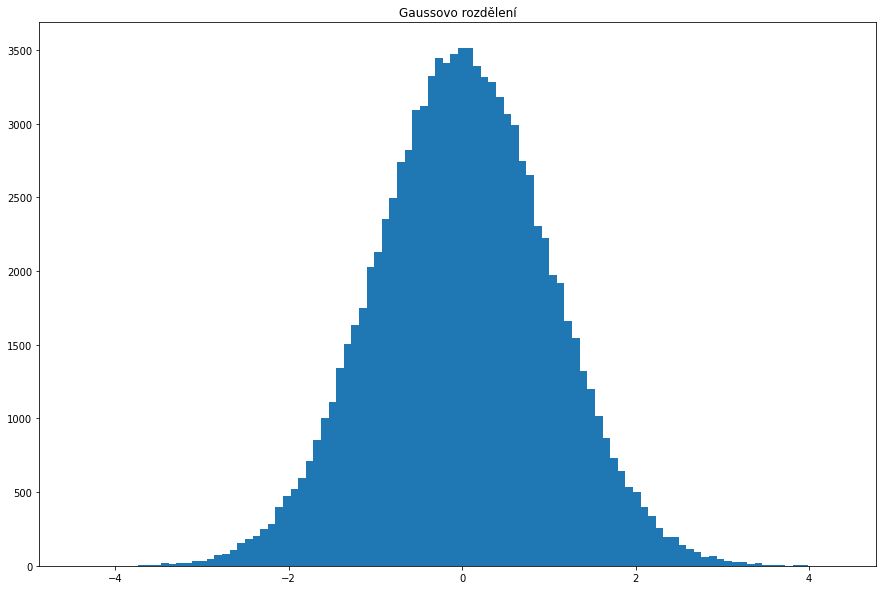

In [ ]:
def randomNumbersG(count=10000):
  result = []
  for i in range(count):
    result.append(random.gauss(0, 1))
  return result

plt.hist(randomNumbersG(100000), bins = 100);
plt.title('Gaussovo rozdělení');

### Exponenciální rozdělení

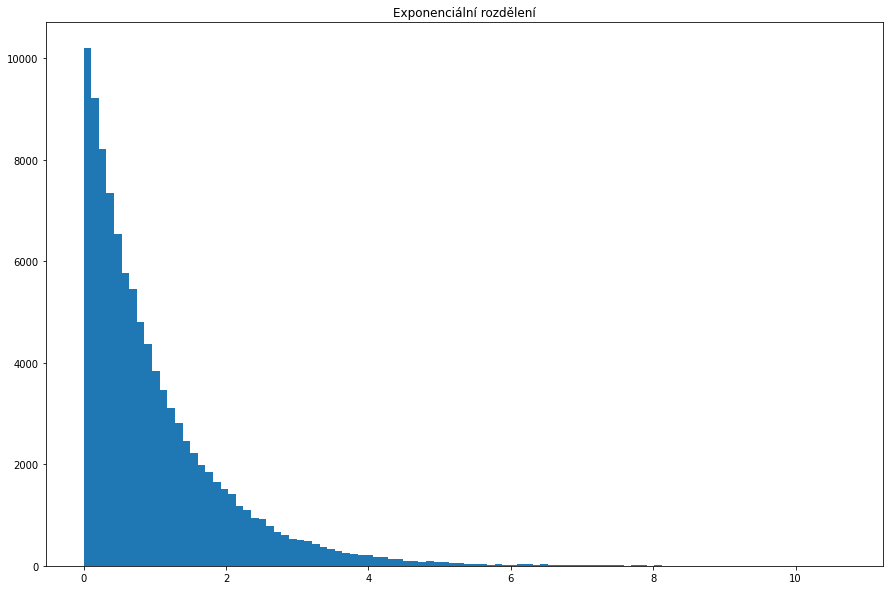

In [ ]:
def randomNumbersE(count=10000):
  result = []
  for i in range(count):
    result.append(random.expovariate(1))
  return result

plt.hist(randomNumbersE(100000), bins = 100);
plt.title('Exponenciální rozdělení');

### Testování náhodných čísel

Text(0.5, 1.0, 'Náhodné body v rovině s rovnoměrným rozdělením')

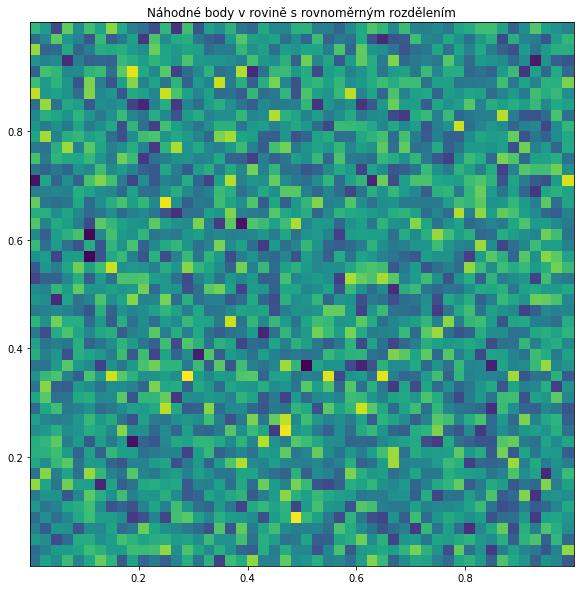

In [ ]:
def randomPoints(count = 10000):
  xx = []
  yy = []
  for i in range(count):
    xx.append(random.random())
    yy.append(random.random())
  return xx, yy

xx, yy = randomPoints(1000000)
plt.hist2d(xx, yy, 50);
plt.gca().set_aspect('equal')
plt.title('Náhodné body v rovině s rovnoměrným rozdělením')

Text(0.5, 1.0, 'Náhodné body v rovině s gausovým rozdělením')

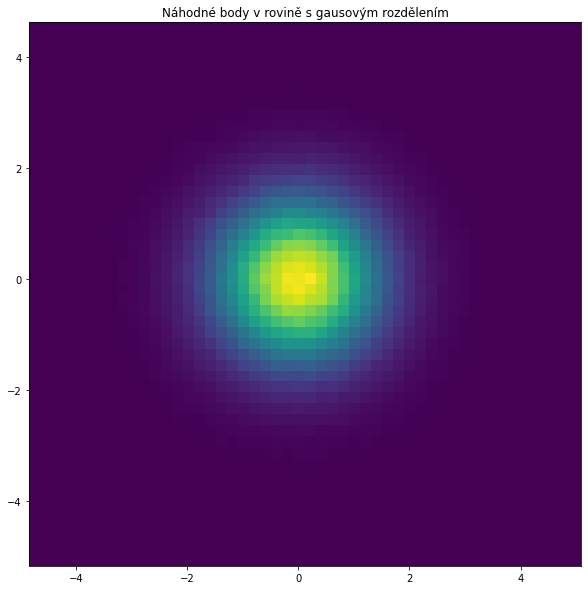

In [ ]:
def randomPointsG(count = 10000):
  xx = []
  yy = []
  for i in range(count):
    xx.append(random.gauss(0, 1))
    yy.append(random.gauss(0, 1))
  return xx, yy

xx, yy = randomPointsG(1000000)
plt.hist2d(xx, yy, 50);
plt.gca().set_aspect('equal')
plt.title('Náhodné body v rovině s gausovým rozdělením')

## Úloha

Navrhněte statistický model průzkumu úseku hraničního pásma s cílem zjistit optimální množství jednotek k jeho pokrytí. Hraniční pásmo uvažujte jako liniový objekt o definované délce. Předpokládejte, že pravděpodobnost jeho narušení má rovnoměrné rozdělení. Uvažujte s dosahem senzorů, které je významně menší než délka úseku hraničního pásma.

Popis jednoho experimentu:
- zjistit, zda bylo pásmu ubráněno
- tj. zachytíme cíl
- cíl je zachycen, jestliže vzdálenost cíle a jednotky je menší než dosah senzorů

Zcela náhodná pozice jednotky, bez ohledu na rozmístění ostatních jednotek

In [ ]:
def experiment(delka, dosah, pocet=1):
  cilX = random.random() * delka
  
  zachycen = False
  for i in range(pocet):
    jednotkaX = random.random() * delka
    zachycen = abs(jednotkaX - cilX) < dosah
    if zachycen:
      break
  return zachycen

Rovnoměrné rozmístění jednotek podle dosahu senzorů.

In [ ]:
def experiment2(delka, dosah, pocet=1):
  cilX = random.random() * delka
  
  zachycen = False
  for i in range(pocet):
    jednotkaX = random.random() * delka / pocet + i * delka / pocet
    zachycen = abs(jednotkaX - cilX) < dosah
    if zachycen:
      break
  return zachycen

Optimalizované rozmístění jednotek podle dosahu senzorů.

In [ ]:
def experiment3(delka, dosah, pocet=1):
  cilX = random.random() * delka
  
  zachycen = False
  for i in range(pocet):
    if dosah * 2 >= delka:
      jednotkaX = 0.5 * delka / pocet + i * delka / pocet
    # v ramci intervalu jednotka muze byt umistena na souradnicich
    # <dosah; delka-dosah>
    # <dosah + i * delka / pocet; (i + 1) * delka / pocet - dosah>
    # velikost je (i + 1) * delka / pocet - dosah - (dosah + i * delka / pocet)
    # (i + 1) * delka / pocet - dosah - dosah - i * delka / pocet
    # i * delka / pocet + delka / pocet - dosah - dosah - i * delka / pocet
    # delka / pocet - 2 * dosah
    else:
      jednotkaX = random.random() * (delka / pocet - 2 * dosah) + dosah + i * delka / pocet

    zachycen = abs(jednotkaX - cilX) < dosah
    if zachycen:
      break
  return zachycen

Statistické vyhodnocení experimentů

In [ ]:
def opakovanyExperiment(delka, dosah, pocetJednotek, experiment=experiment, pocetExperimentu=10000):
  zachyceno = 0
  for i in range(pocetExperimentu):
    if experiment(delka, dosah, pocetJednotek):
      zachyceno = zachyceno + 1
  return zachyceno/pocetExperimentu

print(opakovanyExperiment(1, 0.1, 5, experiment=experiment))
print(opakovanyExperiment(1, 0.1, 5, experiment=experiment2))
print(opakovanyExperiment(1, 0.1, 5, experiment=experiment3))

0.6528
0.8205
1.0


## Statistické hodnocení proměnných závislých na čase

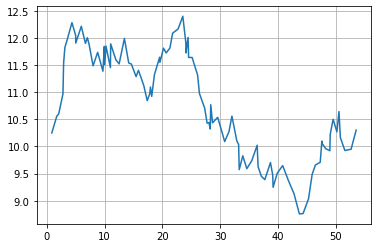

In [6]:
import random
from matplotlib import pyplot as plt

value = 10
yy = []
xx = []
x = 0
for i in range(100):
    x = x + random.random()
    value = value + (random.random() - 0.5)
    yy.append(value)
    xx.append(x)

plt.plot(xx, yy)
plt.grid(which='both')

Jak se spočítá průměrná hodnota?

Jak se počítá průběžná průměrná hodnota?

Vzorec pro výpočet průměrné hodnoty závislé proměnné $y$ a nezávislé proměnné $x$.

$$\bar y = \frac{\sum_{\forall i} x_iy_i}{\sum_{\forall i} x_i}$$

Pokud se jedná o vývoj proměnné v čase (nezávislá proměnná je čas $t$), vzorec se přepisuje do tvaru

$$\bar y = \frac{\sum_{\forall i} \Delta t_iy_i}{\sum_{\forall i} \Delta t_i}$$

V případě simulace je nutné udělat dílčí sumarizaci

$$y_{i+1}^\sum = y_i^\sum + \Delta t_i y_i$$

$$t_{i+1}^\sum = t_i^\sum + \Delta t_i$$

díky sumarizaci je možné počítat (akumulovat) hodnoty čitatele a jmenovatele a určit aktuální průměrnou hodnot závislé proměnné, která je potom dána podílem akumulovaných hodnot

$$\bar y_i = \frac{y_i^\sum}{t_i^\sum}$$


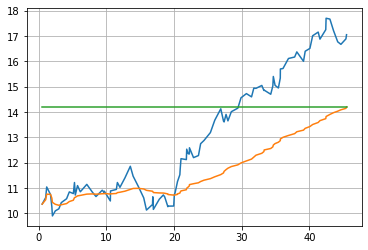

In [14]:
import random
from matplotlib import pyplot as plt

value = 10
yy = [] # vyvoj nahodne promenne
xx = [] # okamziky
x = 0
ySum = 0 # sumarizace nahodne promenne
tSum = 0 # sumarizace casu
yAvg = [] # vyvoj prumeru nahodne promenne

for i in range(100):
    x = x + random.random()
    value = value + (random.random() - 0.5)
    yy.append(value)
    xx.append(x)

    ySum = ySum + value * x
    tSum = tSum + x
    yAvg.append(ySum / tSum)

plt.plot(xx, yy, label='Náhodná proměnná')
plt.plot(xx, yAvg, label='Průměr z minulosti')
plt.plot(xx, [yAvg[-1]]*len(xx), label='Celkový průměr')
plt.grid(which='both')

## Statistické hodnocení logických proměnných závislých na čase

[False, True, False, False, True]


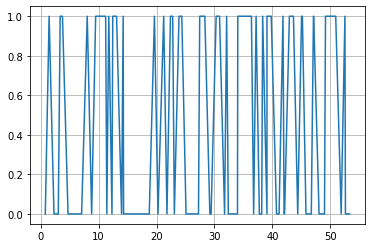

In [17]:
import random
from matplotlib import pyplot as plt

value = 10
yy = []
tt = []
t = 0
for i in range(100):
    t = t + random.random()
    value = random.random() > 0.5
    yy.append(value)
    tt.append(t)

plt.plot(tt, yy)
plt.grid(which='both')
print(yy[0:5])

Logická náhodná proměnná nabývá hodnot `True` a `False`. Po převodu těchto hodnot na čísla `1` a `0` můžeme na výpočet průměrných hodnot využít dříve uvedené vzorce.

[True, False, True, False, False]



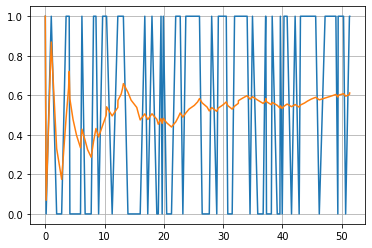

In [20]:
import random
from matplotlib import pyplot as plt

value = 10
yy = []
tt = []
t = 0
yAvg = []
ySum = 0
tSum = 0
for i in range(100):
    t = t + random.random()
    value = random.random() > 0.5
    yy.append(value)
    tt.append(t)

    ySum = ySum + value * t
    tSum = tSum + t
    yAvg.append(ySum / tSum)

plt.plot(tt, yy)
plt.plot(tt, yAvg)
plt.grid(which='both')
print(yy[0:5])
print()